# Multiple Linear Regression

Pada studi kasus analisis regresi linier berganda akan digunakan data dengan lima variabel independen (X) Year, KM_Driven, Fuel, Seller_Type,  dan Transmission, sedangkan variabel dependen (Y) Selling_Price, dengan detail variabel seperti berikut :<br>
Year : Tahun pembuatan mobil <br>
Selling_Price : Harga di mana mobil dijual (dalam mata uang lokal) <br>
KM_Driven : Total kilometer (jarak) yang telah ditempuh mobil <br>
Fuel : Jenis bahan bakar yang digunakan mobil (misalnya: Bensin, Solar) <br>
Seller_Type : Jenis penjualan (misalnya: Perorangan, Pedagang) <br>
Transmission : Jenis transmisi (misalnya: Manual, Otomatis) <br>

Pada studi kasus kali ini, ingin diketahui sejauh mana pengaruh Year, KM_Driven, Fuel, Seller_Type, dan Transmission terhadap Selling_Price ? Dan bagaimana hasil prediksinya ?

## Import Libraries and Data

In [ ]:
# Load library/package
import os
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy.stats import shapiro

# Sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Statmodels
import statsmodels
import statsmodels.api as sm

In [ ]:
# Load Data
data_mobil = "/content/CAR DETAILS FROM CAR DEKHO.csv"
data = pd.read_csv(data_mobil, usecols=['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission'])

In [ ]:
# Menampilkan 10 data teratas
data.head(10)

,year,selling_price,km_driven,fuel,seller_type,transmission
0,2007,60000,70000,Petrol,Individual,Manual
1,2007,135000,50000,Petrol,Individual,Manual
2,2012,600000,100000,Diesel,Individual,Manual
3,2017,250000,46000,Petrol,Individual,Manual
4,2014,450000,141000,Diesel,Individual,Manual
5,2007,140000,125000,Petrol,Individual,Manual
6,2016,550000,25000,Petrol,Individual,Manual
7,2014,240000,60000,Petrol,Individual,Manual
8,2015,850000,25000,Petrol,Individual,Manual
9,2017,365000,78000,CNG,Individual,Manual


## Exploratory Data Analysis (EDA) & Data Preprocessing

Analisis data eksplorasi adalah pendekatan untuk merangkum karakteristik dari data

Data processing adalah proses mengonversi data menjadi informasi yang bermanfaat dan dapat digunakan sesuai dengan tujuan analisis

#### Data Type

In [ ]:
# Mendapatkan informasi dari data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           4340 non-null   int64 
 1   selling_price  4340 non-null   int64 
 2   km_driven      4340 non-null   int64 
 3   fuel           4340 non-null   object
 4   seller_type    4340 non-null   object
 5   transmission   4340 non-null   object
dtypes: int64(3), object(3)
memory usage: 203.6+ KB


In [ ]:
# Melakukan analisa deskriptif
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,4340.0,2013.090783,4.215344,1992.0,2011.00,2014.0,2016.0,2020.0
selling_price,4340.0,504127.311751,578548.736139,20000.0,208749.75,350000.0,600000.0,8900000.0
km_driven,4340.0,66215.777419,46644.102194,1.0,35000.00,60000.0,90000.0,806599.0


ENCODE DATA KARAKTER KE INTEGER

In [ ]:
data_char = data.select_dtypes(include=['object']).columns

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for i in data_char:
  data[i] = encoder.fit_transform(data[i])

In [ ]:
data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission
0,2007,60000,70000,4,1,1
1,2007,135000,50000,4,1,1
2,2012,600000,100000,1,1,1
3,2017,250000,46000,4,1,1
4,2014,450000,141000,1,1,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   year           4340 non-null   int64
 1   selling_price  4340 non-null   int64
 2   km_driven      4340 non-null   int64
 3   fuel           4340 non-null   int64
 4   seller_type    4340 non-null   int64
 5   transmission   4340 non-null   int64
dtypes: int64(6)
memory usage: 203.6 KB


### Missing Value



Missing value adalah data yang hilang, atau nilai yang hilang, terjadi ketika tidak ada nilai data yang disimpan untuk variabel dalam pengamatan. Kita ingin melakukan identifikasi, apakah terdapat data yang missing atau tidak dalam observasi pengamatan.

In [ ]:
# Check missing value
data.isna().sum()

,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0


### Duplicates data

Melakukan identifikasi, apakah terdapat data/observasi yang sama atau tidak

In [ ]:
# Cek duplicate
duplicate = data[data.duplicated()]
duplicate

,year,selling_price,km_driven,fuel,seller_type,transmission
13,2007,60000,70000,4,1,1
14,2007,135000,50000,4,1,1
15,2012,600000,100000,1,1,1
16,2017,250000,46000,4,1,1
17,2014,450000,141000,1,1,1
...,...,...,...,...,...,...
4310,2015,465000,41123,1,0,1
4311,2017,1900000,20118,4,0,0
4319,2012,400000,70000,1,1,1
4322,2013,500000,120000,1,1,1


In [ ]:
# drop duplicate
data.drop_duplicates(inplace=True)

In [ ]:
# Cek ukuran data apakah duplicate sudah terhapus
data.shape

(3421, 6)

### Asumsi Analisis Regresi

Uji Asumsi klasik adalah analisis yang dilakukan untuk menilai apakah di dalam sebuah model regresi linear Ordinary Least Square (OLS) terdapat masalah-masalah asumsi klasik.

#### Uji Normalitas

Uji Normalitas adalah uji statistik yang dilakukan untuk mengetahui bagaimana sebaran sebuah data.

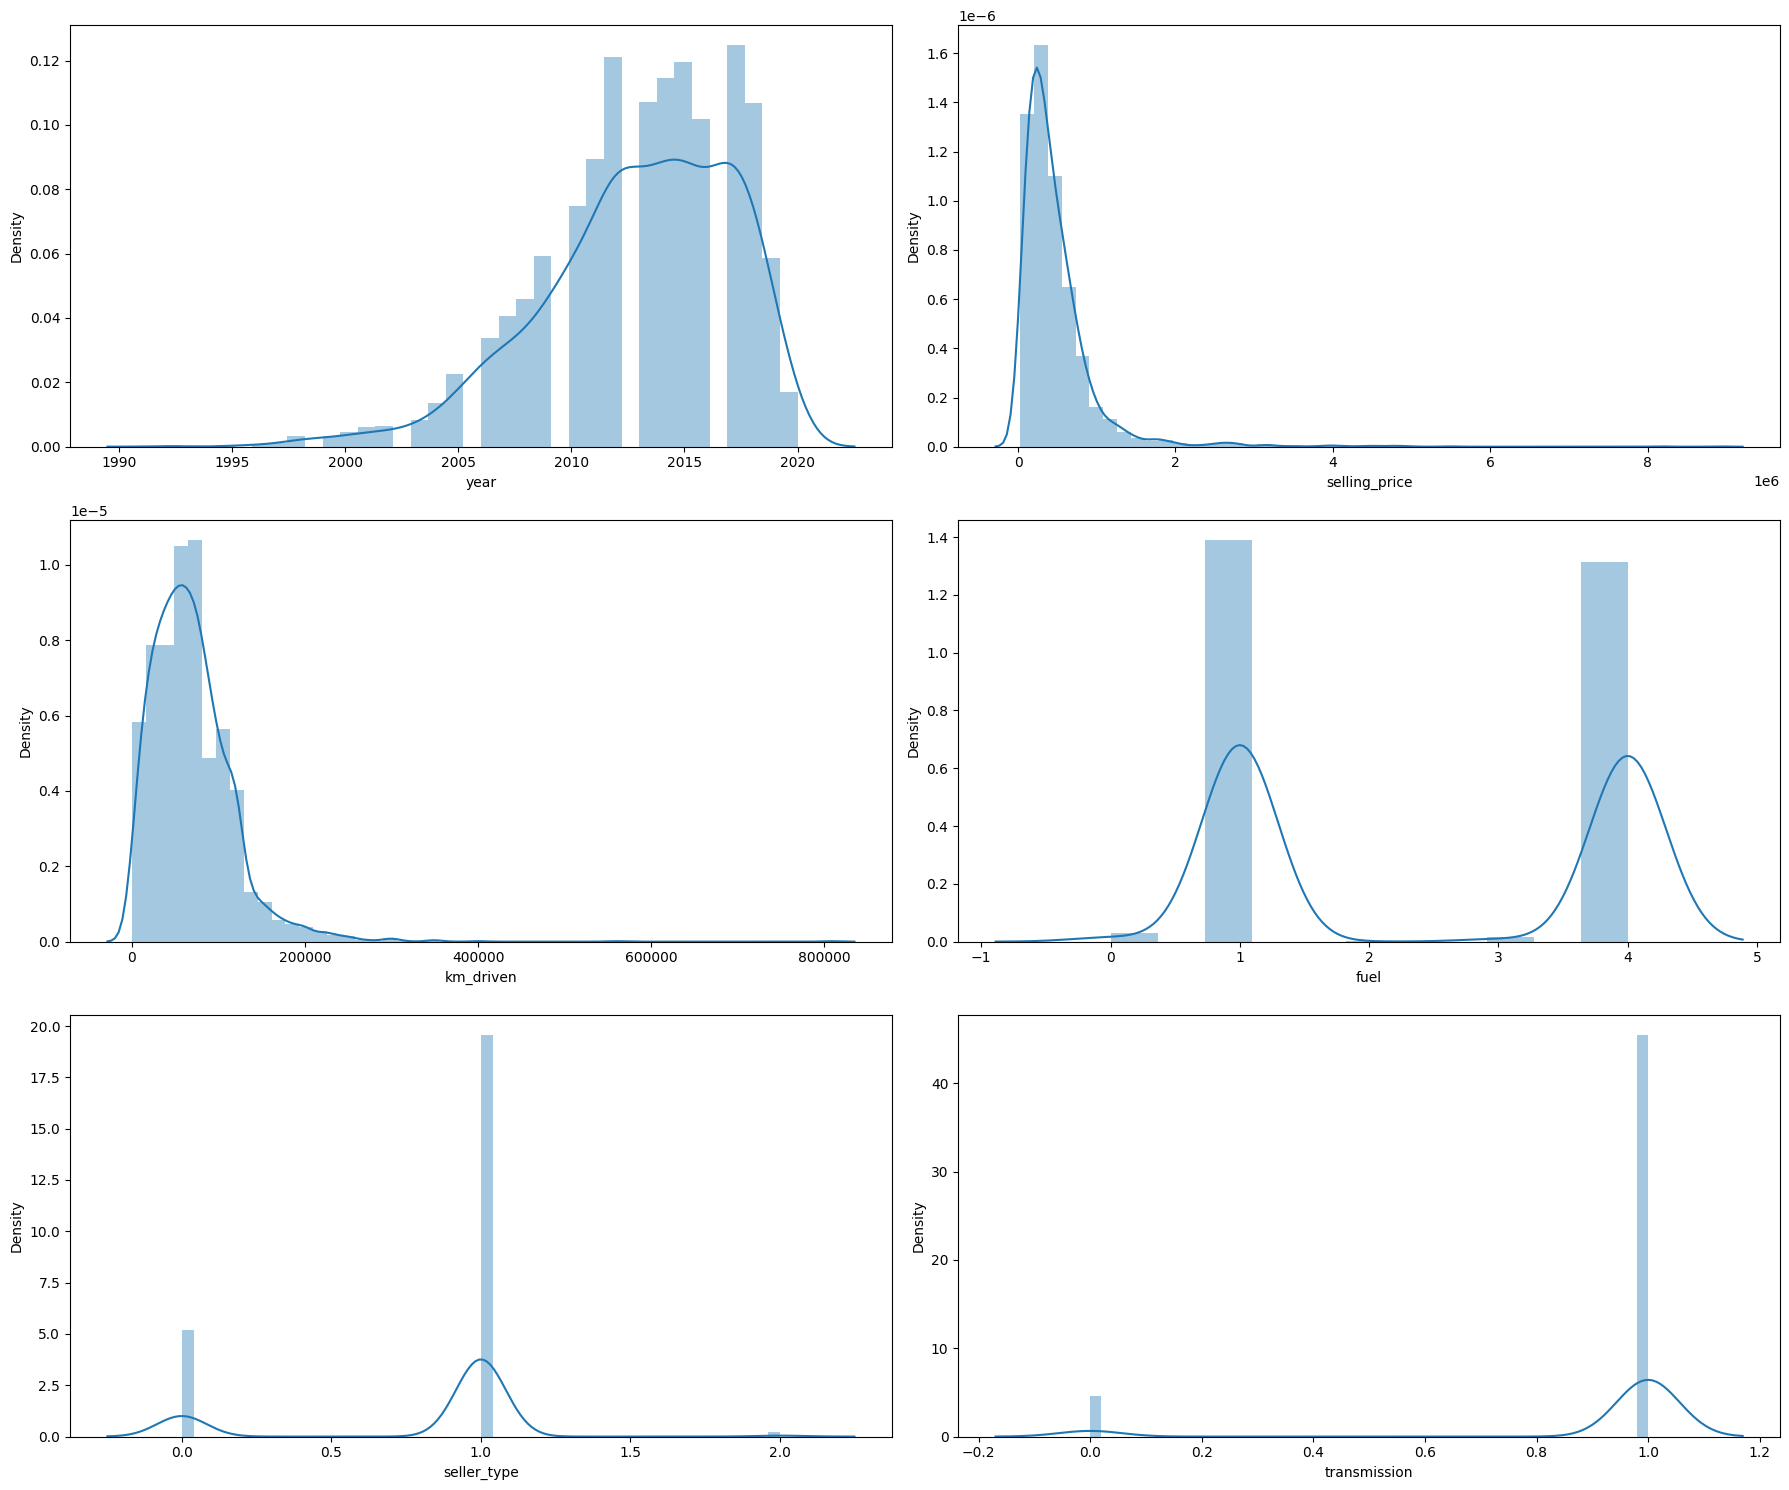

In [ ]:
# Cek normalitas data dengan histogram
warnings.filterwarnings('ignore')
fig, axes = plt.subplots(3, 2, figsize=(18, 15))

sns.distplot(data["year"], ax=axes[0, 0])
sns.distplot(data["selling_price"], ax=axes[0, 1])
sns.distplot(data["km_driven"], ax=axes[1, 0])
sns.distplot(data["fuel"], ax=axes[1, 1])
sns.distplot(data["seller_type"], ax=axes[2, 0])
sns.distplot(data["transmission"], ax=axes[2, 1])

plt.tight_layout()
plt.show()

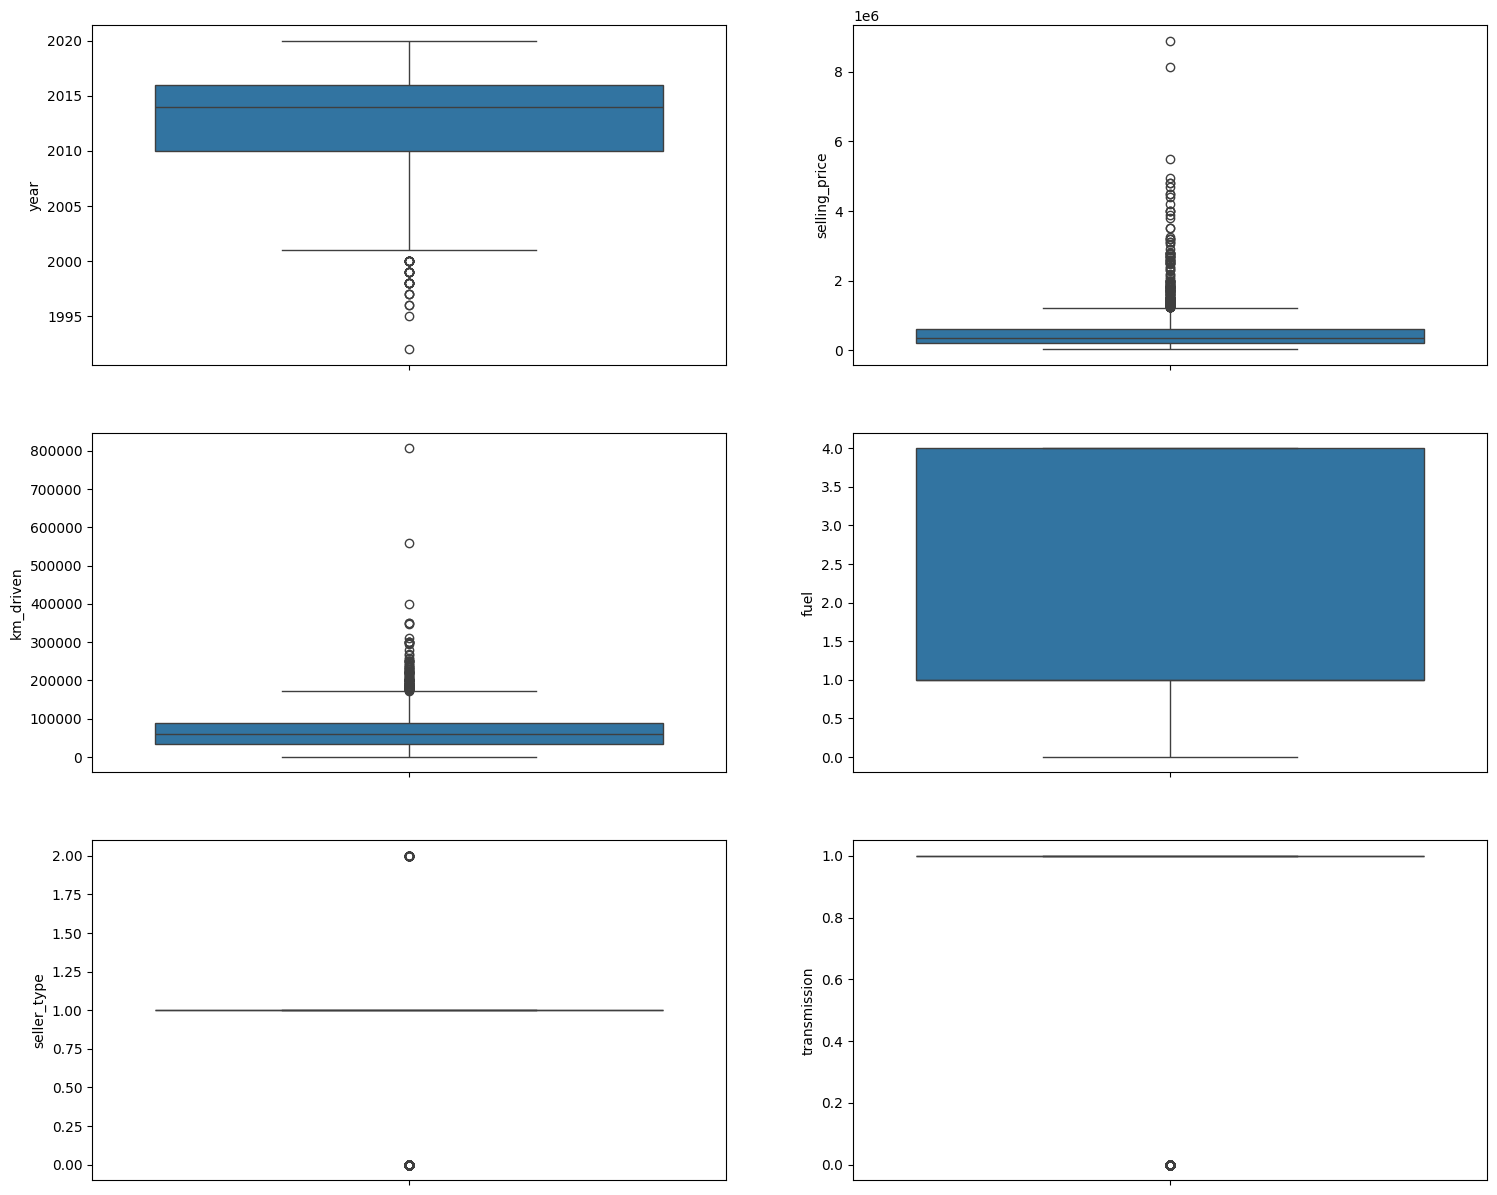

In [ ]:
# Cek normalitas data dengan boxplot
fig, axes = plt.subplots(3, 2, figsize=(18, 15))

sns.boxplot(data["year"], ax=axes[0, 0])
sns.boxplot(data["selling_price"], ax=axes[0, 1])
sns.boxplot(data["km_driven"], ax=axes[1, 0])
sns.boxplot(data["fuel"], ax=axes[1, 1])
sns.boxplot(data["seller_type"], ax=axes[2, 0])
sns.boxplot(data["transmission"], ax=axes[2, 1])

plt.show()

Syarat distribusi normal pada data hanya diberlakukan pada variabel Y, akan tetapi kita akan melihat sebaran data dari semua varaibel.

Terlihat dari histogram, bahwa variabel Y Sales Price berdistribusi normal, sedangkan pada variabel X LotArea dan TotalBsmSF membentuk lonceng berdistribusi normal dan variabel X MSSubClass tidak membentuk lonceng (tidak berdistrubis normal)

Dan dari gambar boxplot, dilihat dari sebaran data pada kuartal 1, kuartal 2 dan kuartal 3, apakah memiliki bentuk yang simetris?

Dikatakan distribusi normal ketika membentuk pola yang simetris.

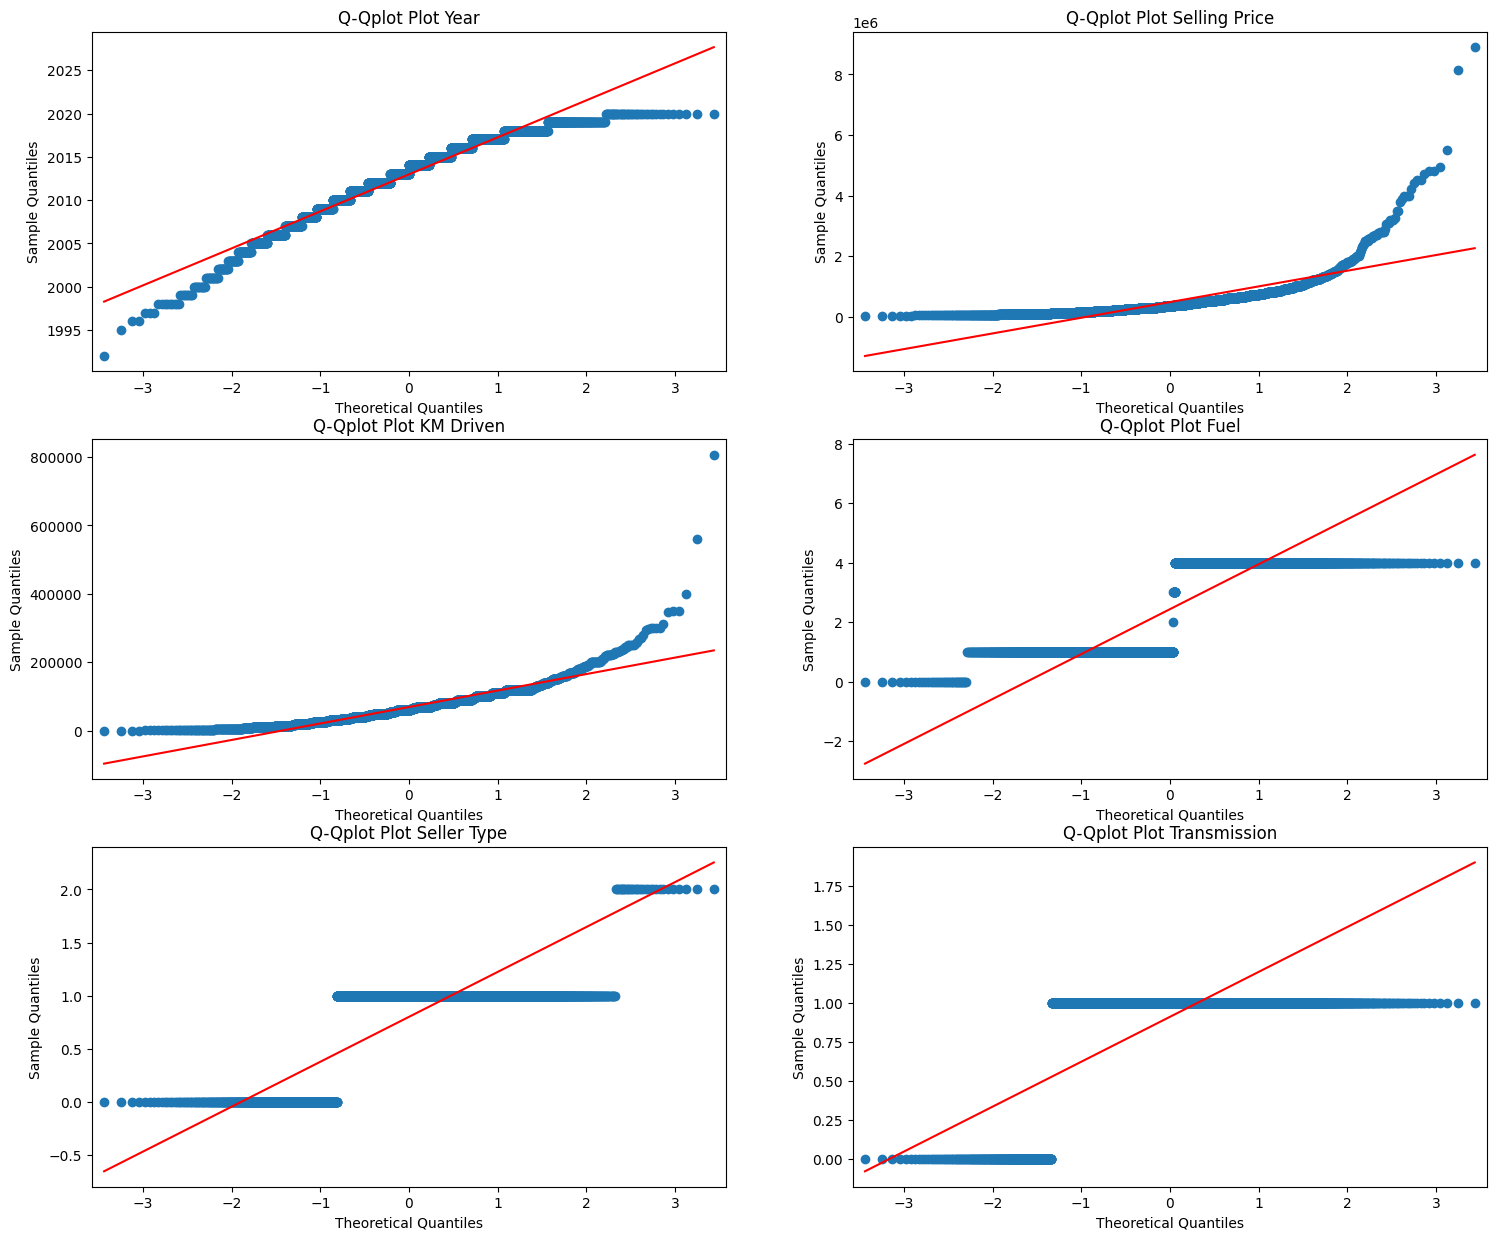

In [ ]:
# Cek normalitas data dengan Q-Q plot
fig, axes = plt.subplots(3, 2, figsize=(18, 15))
axes = axes.flatten()

sm.graphics.qqplot(data["year"].dropna(), line='s', ax=axes[0])
axes[0].title.set_text('Q-Qplot Plot Year')

sm.graphics.qqplot(data["selling_price"].dropna(), line='s', ax=axes[1])
axes[1].title.set_text('Q-Qplot Plot Selling Price')

sm.graphics.qqplot(data["km_driven"].dropna(), line='s', ax=axes[2])
axes[2].title.set_text('Q-Qplot Plot KM Driven')

sm.graphics.qqplot(data["fuel"].dropna(), line='s', ax=axes[3])
axes[3].title.set_text('Q-Qplot Plot Fuel')

sm.graphics.qqplot(data["seller_type"].dropna(), line='s', ax=axes[4])
axes[4].title.set_text('Q-Qplot Plot Seller Type')

sm.graphics.qqplot(data["transmission"].dropna(), line='s', ax=axes[5])
axes[5].title.set_text('Q-Qplot Plot Transmission')

plt.show()

Uji Normalitas dengan Shapiro Wilk

H0 : data berdistribusi normal<br>
H1 : data tidak berdistribusi normal

In [ ]:
# Cek Normalitas dengan Uji Shapiro-Wilk
for i in data.columns:
    stat, p = shapiro(data[i])
    print(f'Kolom: {i}')
    print(f'Statistik Uji Shapiro-Wilk = {stat:.3f}, p-value = {p:.3f}')

    # Pengujian hipotesis
    alpha = 0.05
    if p > alpha:
        print(f'Gagal Tolak H0: {i} berdistribusi normal\n')
    else:
        print(f'Tolak H0: {i} tidak berdistribusi normal\n')

Kolom: year
Statistik Uji Shapiro-Wilk = 0.952, p-value = 0.000
Tolak H0: year tidak berdistribusi normal

Kolom: selling_price
Statistik Uji Shapiro-Wilk = 0.605, p-value = 0.000
Tolak H0: selling_price tidak berdistribusi normal

Kolom: km_driven
Statistik Uji Shapiro-Wilk = 0.861, p-value = 0.000
Tolak H0: km_driven tidak berdistribusi normal

Kolom: fuel
Statistik Uji Shapiro-Wilk = 0.658, p-value = 0.000
Tolak H0: fuel tidak berdistribusi normal

Kolom: seller_type
Statistik Uji Shapiro-Wilk = 0.547, p-value = 0.000
Tolak H0: seller_type tidak berdistribusi normal

Kolom: transmission
Statistik Uji Shapiro-Wilk = 0.324, p-value = 0.000
Tolak H0: transmission tidak berdistribusi normal



#### Uji Linearitas

Uji Linearitas adalah sifat hubungan yang linear antara variabel, artinya setiap perubahan yang terjadi pada satu variabel akan diikuti perubahan dengan besaran yang sejajar pada variabel lainnya.

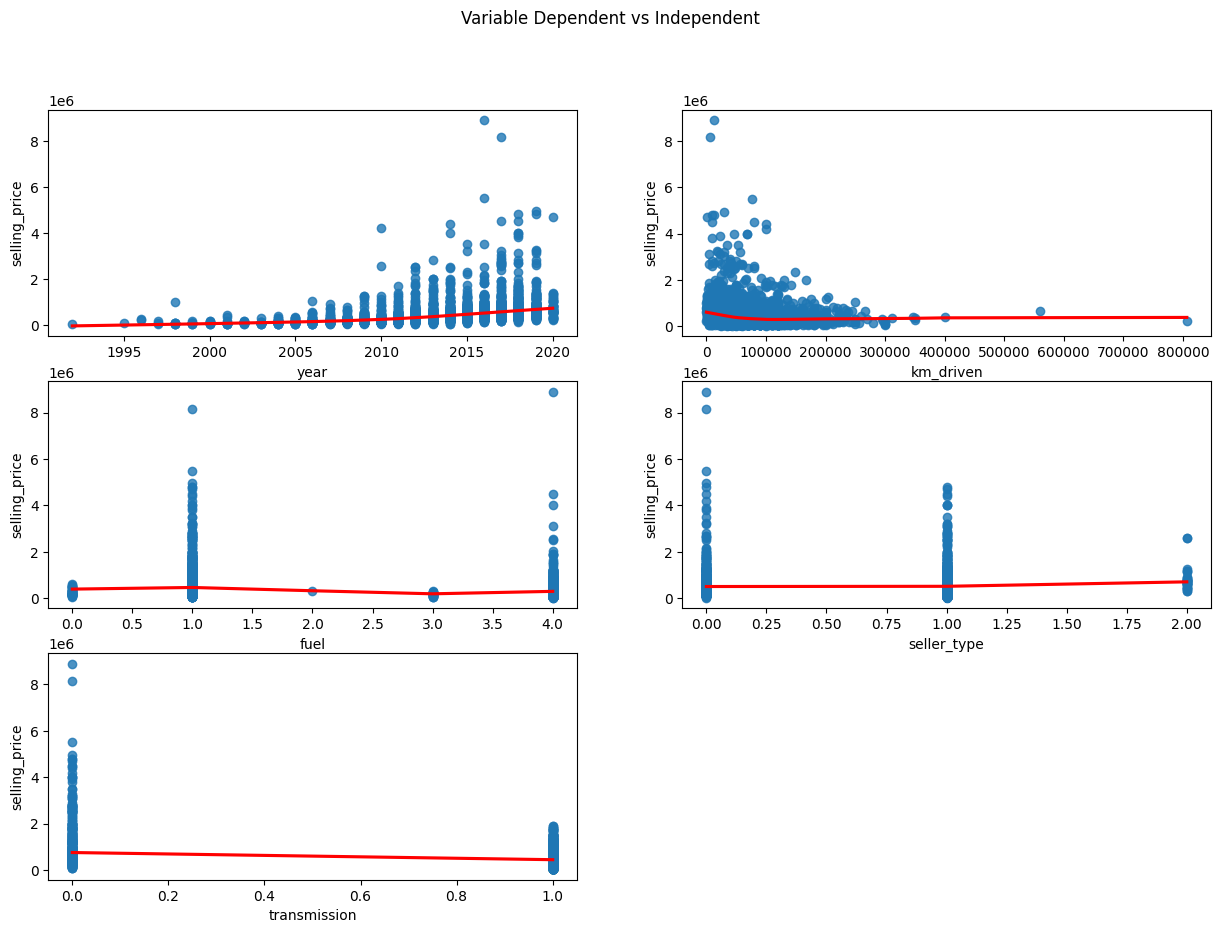

In [ ]:
# Keterkaitan x dengan y
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
fig.suptitle('Variable Dependent vs Independent')
axes = axes.flatten()

sns.regplot(x=data["year"], y=data["selling_price"], lowess=True, line_kws={'color': 'red'}, ax=axes[0])
sns.regplot(x=data['km_driven'], y=data["selling_price"], lowess=True, line_kws={'color': 'red'}, ax=axes[1])
sns.regplot(x=data["fuel"], y=data["selling_price"], lowess=True, line_kws={'color': 'red'}, ax=axes[2])
sns.regplot(x=data['seller_type'], y=data["selling_price"], lowess=True, line_kws={'color': 'red'}, ax=axes[3])
sns.regplot(x=data['transmission'], y=data["selling_price"], lowess=True, line_kws={'color': 'red'}, ax=axes[4])

plt.delaxes()
plt.show()

#### Uji Multikolinearitas

Uji multikolinearitas adalah untuk melihat ada atau tidaknya korelasi yang tinggi antara variabel-variabel bebas dalam suatu model regresi linear berganda

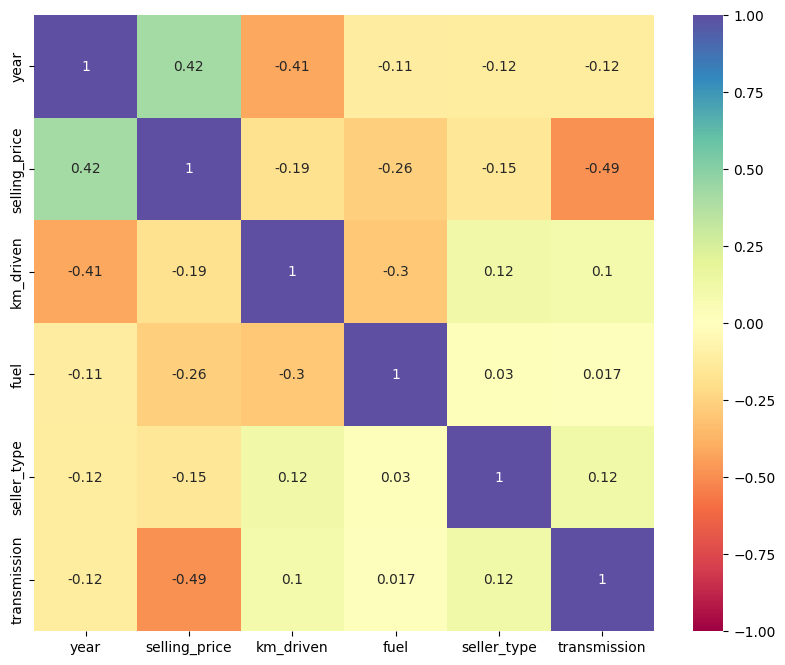

In [ ]:
# Membuat heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), vmax=1, vmin=-1, center=0, cmap="Spectral", annot=True)
plt.show()

Heatmap ini menunjukkan korelasi antara beberapa fitur dalam dataset mobil, seperti tahun, harga jual, jarak tempuh, jenis bahan bakar, tipe penjual, dan jenis transmisi. Terdapat korelasi positif antara tahun dan harga jual mobil (0.42), yang menunjukkan bahwa mobil yang lebih baru cenderung memiliki harga jual lebih tinggi. Sebaliknya, tahun dan jarak tempuh memiliki korelasi negatif (-0.41), yang mengindikasikan bahwa mobil yang lebih tua cenderung menempuh jarak lebih jauh. Korelasi negatif lemah antara harga jual dan jarak tempuh (-0.19) menunjukkan bahwa mobil dengan jarak tempuh yang lebih tinggi cenderung memiliki harga jual yang sedikit lebih rendah. Harga jual memiliki korelasi negatif yang cukup kuat dengan jenis transmisi (-0.49) dan jenis bahan bakar (-0.26), menunjukkan bahwa tipe transmisi dan bahan bakar tertentu, seperti mungkin transmisi manual atau bahan bakar bensin, mungkin berkaitan dengan harga jual yang lebih rendah. Di sisi lain, jenis bahan bakar dan jarak tempuh juga memiliki korelasi negatif (-0.3), yang menunjukkan bahwa mobil dengan jarak tempuh yang lebih rendah cenderung menggunakan bahan bakar tertentu, meskipun jenis bahan bakar dan transmisi tidak menunjukkan hubungan korelasi yang signifikan (0.017). Dengan demikian, fitur tahun dan jenis transmisi memiliki korelasi yang cukup kuat dengan harga jual, menjadikannya variabel penting untuk dipertimbangkan dalam memprediksi harga mobil.

In [ ]:
# Cek Urutan korelasi terendah ke tertinggi
korelasi = data.corr()["selling_price"].sort_values()
korelasi

,selling_price
transmission,-0.487790
fuel,-0.258633
km_driven,-0.186133
seller_type,-0.149684
year,0.421523
selling_price,1.000000


Diperoleh: <BR>

1. transmission (-0.488): Jenis transmisi memiliki pengaruh negatif cukup kuat terhadap harga jual, yang menunjukkan bahwa mobil dengan transmisi tertentu (kemungkinan manual) cenderung memiliki harga yang lebih rendah dibandingkan transmisi lainnya (mungkin otomatis). <br>

2. fuel (-0.259): Jenis bahan bakar juga memiliki pengaruh negatif, yang berarti mobil dengan bahan bakar tertentu (mungkin bensin) cenderung lebih murah dibandingkan bahan bakar lain seperti diesel atau listrik. <br>

3. km_driven (-0.186): Semakin jauh jarak tempuh mobil, harganya cenderung sedikit lebih rendah, tetapi pengaruhnya tidak begitu besar. <br>

4. seller_type (-0.150): Tipe penjual (misalnya, dealer atau pribadi) berpengaruh lemah terhadap harga jual, jadi faktor ini tidak terlalu signifikan. <br>

5. year (0.422): Tahun produksi mobil memiliki pengaruh positif cukup kuat terhadap harga jual, yang menunjukkan bahwa mobil yang lebih baru umumnya memiliki harga jual lebih tinggi. <br>


Secara keseluruhan, mobil yang lebih baru dan bertransmisi otomatis tampaknya lebih bernilai, sementara jenis bahan bakar dan jarak tempuh juga memiliki sedikit pengaruh pada harga jual.

### Scaling
Scaling digunakan untuk merubah skala pada data. Penggunaan scaling dapat membantu mengurangi gap antar kolom dalam data, proses ini tidak merubah distribusi dalam data, hanya melakukan pengubahan skala data.

In [ ]:
# Scale data
scaler = StandardScaler()
scaled_data_mobil = scaler.fit_transform(data)
scaled_data_mobil

array([[-1.3974611 , -0.81050622,  0.01665545,  1.03788249,  0.46994357,
         0.31622777],
       [-1.3974611 , -0.66562576, -0.39882026,  1.03788249,  0.46994357,
         0.31622777],
       [-0.22703696,  0.23263305,  0.63986901, -0.95087554,  0.46994357,
         0.31622777],
       ...,
       [-0.92929145, -0.71391925,  0.28671466,  1.03788249,  0.46994357,
         0.31622777],
       [ 0.70930234,  0.74454399,  0.43213116, -0.95087554,  0.46994357,
         0.31622777],
       [ 0.70930234, -0.49176922, -0.60655811,  1.03788249,  0.46994357,
         0.31622777]])

In [ ]:
# Membuat dataframe dari hasil scalling
scaled_data_mobil = pd.DataFrame(scaled_data_mobil, columns=data.columns)
scaled_data_mobil

,year,selling_price,km_driven,fuel,seller_type,transmission
0,-1.397461,-0.810506,0.016655,1.037882,0.469944,0.316228
1,-1.397461,-0.665626,-0.398820,1.037882,0.469944,0.316228
2,-0.227037,0.232633,0.639869,-0.950876,0.469944,0.316228
3,0.943387,-0.443476,-0.481915,1.037882,0.469944,0.316228
4,0.241133,-0.057128,1.491594,-0.950876,0.469944,0.316228
...,...,...,...,...,...,...
3416,-0.227037,0.232633,2.094034,-0.950876,0.469944,0.316228
3417,0.241133,-0.134399,0.224393,-0.950876,0.469944,0.316228
3418,-0.929291,-0.713919,0.286715,1.037882,0.469944,0.316228
3419,0.709302,0.744544,0.432131,-0.950876,0.469944,0.316228


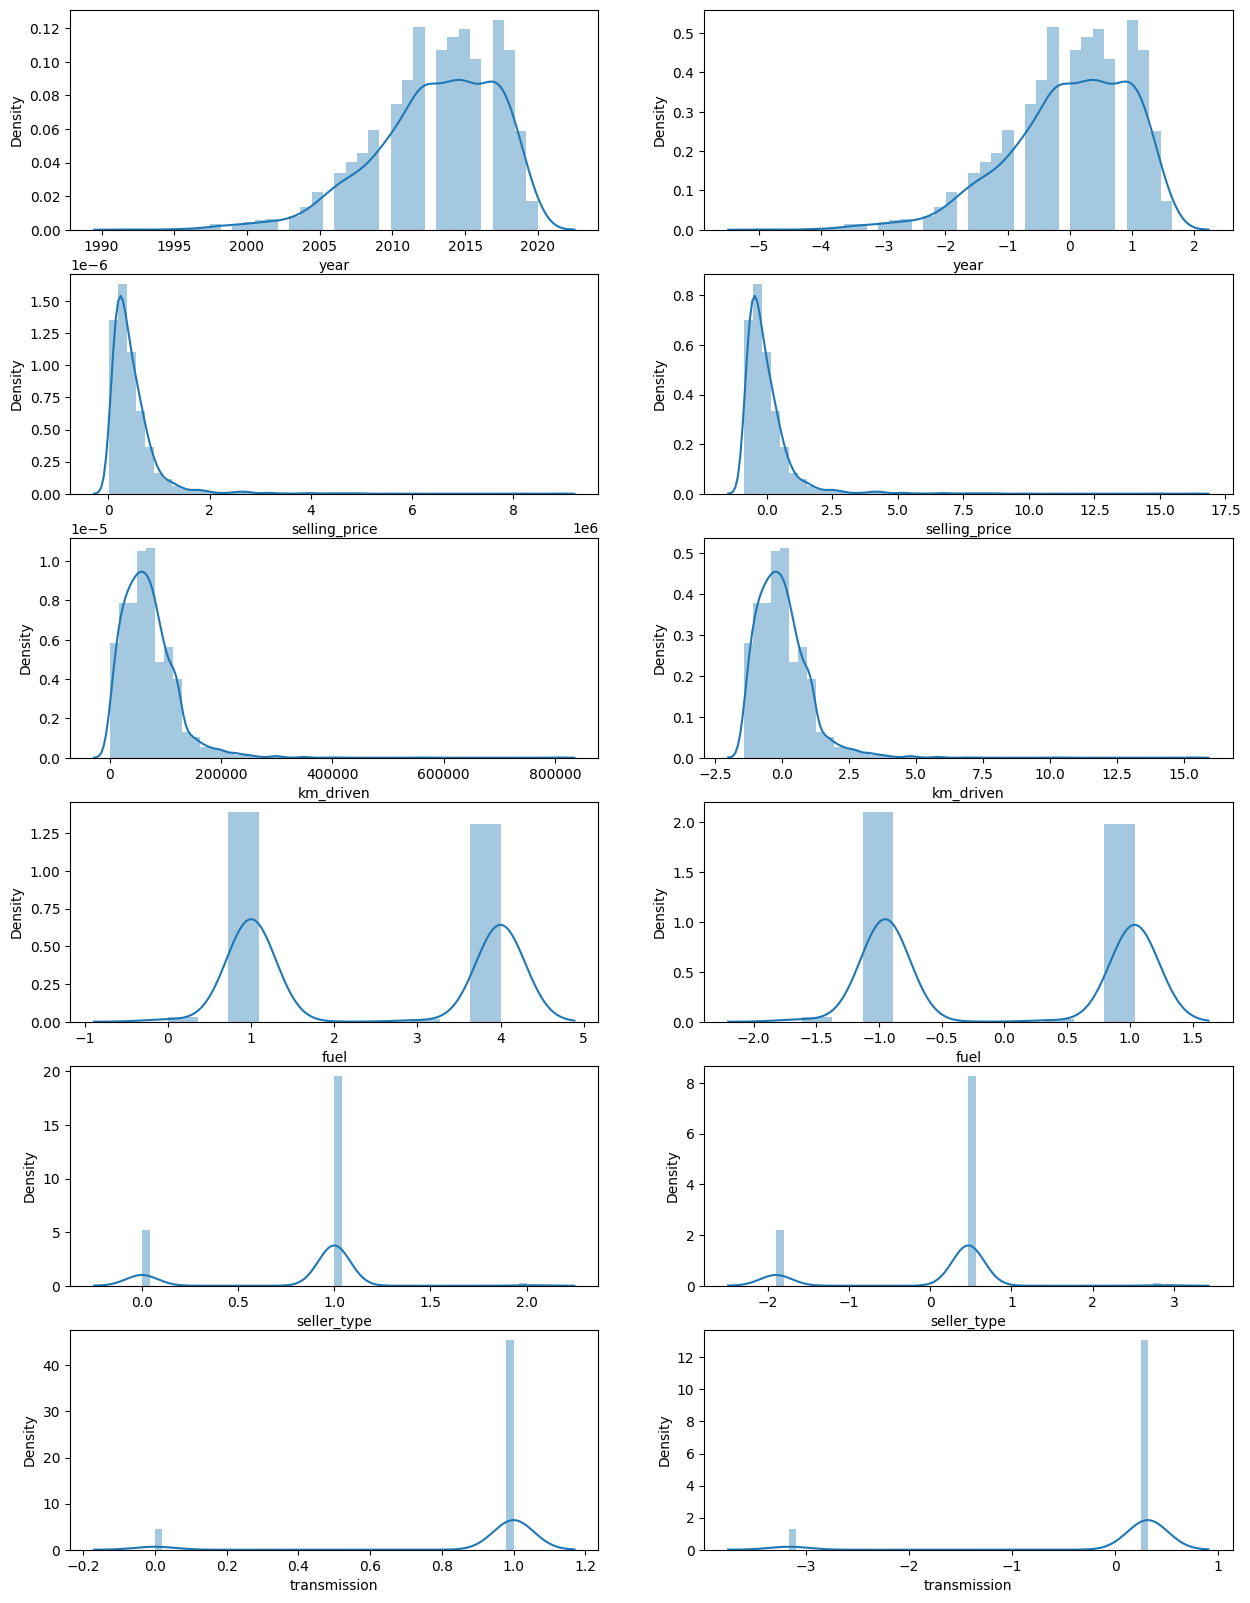

In [ ]:
# Plot variabel sebelum dan sesudah scaling
fig, axes = plt.subplots(6, 2, figsize=(15, 20))


sns.distplot(data["year"], ax=axes[0, 0])
sns.distplot(scaled_data_mobil["year"], ax=axes[0, 1])
sns.distplot(data["selling_price"], ax=axes[1, 0])
sns.distplot(scaled_data_mobil["selling_price"], ax=axes[1, 1])
sns.distplot(data["km_driven"], ax=axes[2, 0])
sns.distplot(scaled_data_mobil["km_driven"], ax=axes[2, 1])
sns.distplot(data['fuel'], ax=axes[3, 0])
sns.distplot(scaled_data_mobil['fuel'], ax=axes[3, 1])
sns.distplot(data['seller_type'], ax=axes[4, 0])
sns.distplot(scaled_data_mobil['seller_type'], ax=axes[4, 1])
sns.distplot(data['transmission'], ax=axes[5, 0])
sns.distplot(scaled_data_mobil['transmission'], ax=axes[5, 1])

plt.show()

## Membangun Model Regresi

### Train Test Split

Proses ini merupakan proses pembagian data dalam bentuk, train (untuk membangun model), dan test (untuk testing dari model yang terbentuk) dengan pembagian 70% data train dan 30% data test

In [ ]:
X = scaled_data_mobil.drop("selling_price", axis=1).values
y = scaled_data_mobil["selling_price"].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [ ]:
print("Ukuran X train ", len(X_train))
print("Ukuran X test ", len(X_test))
print("Ukuran y train ", len(y_train))
print("Ukuran y test ", len(y_test))

Ukuran X train  2394
Ukuran X test  1027
Ukuran y train  2394
Ukuran y test  1027


### Membangun model dengan package Statsmodels

In [ ]:
# Masukkan intercepts secara manual
Input = sm.add_constant(X_train)

In [ ]:
# Modelling dengan statsmodels
SimpleModel = sm.OLS(y_train, Input, missing='drop')
results = SimpleModel.fit()

In [ ]:
# Print results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     404.0
Date:                Fri, 08 Nov 2024   Prob (F-statistic):          1.34e-314
Time:                        10:32:41   Log-Likelihood:                -2537.7
No. Observations:                2394   AIC:                             5087.
Df Residuals:                    2388   BIC:                             5122.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0067      0.014     -0.472      0.6

Dari output diatas, kita dapat melihat nilai - nilai :

Berikut adalah interpretasi output hasil regresi OLS (Ordinary Least Squares) dari model ini:

1. **R-squared**: Nilai R-squared sebesar 0.458 menunjukkan bahwa sekitar 45.8% variabilitas dari variabel dependen \( y \) (misalnya, harga jual atau variabel target lainnya) dapat dijelaskan oleh variabel independen \( x1 \) hingga \( x5 \) dalam model ini. Ini adalah tingkat penjelasan yang moderat, menunjukkan bahwa model menjelaskan sebagian variabilitas data, tetapi masih ada faktor lain yang tidak tercakup oleh model.

2. **Adj. R-squared**: Adjusted R-squared sebesar 0.457, sedikit lebih rendah dari R-squared, mempertimbangkan jumlah variabel dalam model dan ukuran sampel. Hal ini menunjukkan bahwa model tidak mengalami overfitting.

3. **F-statistic dan Prob (F-statistic)**: Nilai F-statistic sebesar 404.0 dan p-value sangat kecil (1.34e-314) menunjukkan bahwa model ini secara keseluruhan signifikan secara statistik. Artinya, setidaknya satu dari variabel independen dalam model berkontribusi signifikan terhadap variabel dependen \( y \).

4. **Koefisien (coef)**:
   - **const** (-0.0067): Konstanta atau intercept dalam model ini adalah -0.0067. Ini adalah nilai rata-rata \( y \) ketika semua variabel independen bernilai nol, meskipun tidak selalu memiliki interpretasi langsung.
   - **x1 (0.2985)**: Koefisien positif menunjukkan bahwa jika variabel \( x1 \) naik satu unit, maka variabel dependen \( y \) akan meningkat sebesar 0.2985 unit, dengan asumsi variabel lain tetap konstan. P-value (0.000) menunjukkan koefisien ini signifikan secara statistik.
   - **x2 (-0.0718)**: Koefisien negatif menunjukkan bahwa jika \( x2 \) naik satu unit, \( y \) akan turun sebesar 0.0718 unit, dengan variabel lain konstan. P-value (0.000) menunjukkan koefisien ini signifikan.
   - **x3 (-0.2391)**: Jika \( x3 \) naik satu unit, \( y \) akan berkurang 0.2391 unit. Koefisien ini signifikan secara statistik (p-value 0.000).
   - **x4 (-0.0341)**: Jika \( x4 \) naik satu unit, \( y \) akan berkurang sebesar 0.0341 unit. Koefisien ini juga signifikan secara statistik, meskipun lebih lemah (p-value 0.019).
   - **x5 (-0.4299)**: Koefisien negatif yang kuat, menunjukkan bahwa jika \( x5 \) naik satu unit, \( y \) akan turun sebesar 0.4299 unit. Koefisien ini sangat signifikan secara statistik (p-value 0.000).

5. **T-statistic dan P>|t|**: Nilai t-statistic dan p-value untuk masing-masing koefisien menunjukkan signifikansi statistik variabel. Semua variabel dalam model ini memiliki p-value kurang dari 0.05, sehingga semuanya signifikan pada tingkat kepercayaan 95%.

6. **Durbin-Watson**: Nilai Durbin-Watson mendekati 2 (2.001), menunjukkan tidak adanya autokorelasi di antara residual, yang merupakan indikasi baik bagi model regresi.

7. **Omnibus, Prob(Omnibus), Jarque-Bera, Skew, Kurtosis**: Nilai-nilai ini terkait dengan distribusi residual. Probabilitas Omnibus dan Jarque-Bera sangat kecil (0.000), dan nilai skewness serta kurtosis menunjukkan adanya deviasi dari distribusi normal. Ini mungkin mengindikasikan bahwa residual tidak sepenuhnya terdistribusi normal, yang dapat memengaruhi interpretasi signifikan jika asumsi normalitas penting dalam model.

**Kesimpulan**: Model ini cukup baik dalam menjelaskan variabilitas data dengan R-squared sebesar 0.458 dan seluruh variabel signifikan secara statistik. Namun, distribusi residual yang tidak normal dapat memengaruhi asumsi klasik regresi, yang sebaiknya diperhatikan untuk analisis lebih lanjut.

In [ ]:
print('coefficient of determination:', results.rsquared)
print('adjusted coefficient of determination:', results.rsquared_adj)
print('regression coefficients:', results.params)

coefficient of determination: 0.45826487073543964
adjusted coefficient of determination: 0.45713058445138477
regression coefficients: [-0.00674777  0.29854149 -0.07178826 -0.23907003 -0.03410724 -0.42994935]


In [ ]:
# membuat list
list_columns = []

for i in data.columns:
  if i != "selling_price":
    list_columns.append(i)

In [ ]:
list_columns

['year', 'km_driven', 'fuel', 'seller_type', 'transmission']

In [ ]:
print(X_test.shape)
print(len(list_columns))

(1027, 5)
5


In [ ]:
list_columns = ['selling_price', 'km_driven']  # Ganti dengan nama kolom yang sesuai

In [ ]:
X_test.shape

(1027, 5)

In [ ]:
# Membuat Prediksi Model
Input_test = sm.add_constant(X_test)
prediction_1 = results.predict(Input_test)

# Tampilkan dalam bentuk dataframe
df_statsmod = pd.DataFrame(X_test, columns=list_columns)
df_statsmod["actual_price"] = y_test
df_statsmod["prediction_price"] = prediction_1
df_statsmod.head()

,year,km_driven,fuel,seller_type,transmission,actual_price,prediction_price
0,1.411557,-0.814296,-0.950876,0.469944,0.316228,1.198503,0.548453
1,-0.461122,0.432131,-0.950876,0.469944,0.316228,-0.559380,-0.100098
2,0.241133,-0.398820,-0.950876,0.469944,0.316228,1.101916,0.169206
3,0.709302,-0.336499,1.037882,0.469944,0.316228,-0.540063,-0.170952
4,-1.163376,-0.191082,1.037882,0.469944,0.316228,-0.750236,-0.740463


#### Uji distrubusi residual

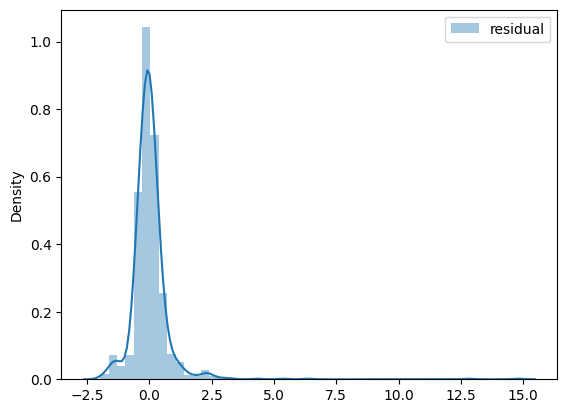

In [ ]:
# Melihat distribusi residual
residual1 = df_statsmod['actual_price'] - df_statsmod['prediction_price']
sns.distplot(residual1, label="residual")
plt.legend()
plt.show()

In [ ]:
# Uji Normalitas pada Residual
stat, p = shapiro(residual1)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# Pengujian Hipotesis
alpha = 0.05
if p > alpha:
  print('Gagal Tolak H0, residual berdistribusi normal')
else:
  print('Tolak H0, residual tidak berdistribusi normal')

Statistics=0.540, p=0.000
Tolak H0, residual tidak berdistribusi normal


Dari gambar diatas, plot residual yang dihasilkan membentuk lonceng, tetapi pada pengujian normalitas dengan uji Shapiro-Wilk menunjukkan bahwa residual tidak berdistribusi normal. Sehingga dapat disimpulkan residual tidak berdistribusi normal.

In [ ]:
# Memasukkan residual kedalam dataframe
df_statsmod["residual"] = residual1
df_statsmod.head()

,year,km_driven,fuel,seller_type,transmission,actual_price,prediction_price,residual
0,1.411557,-0.814296,-0.950876,0.469944,0.316228,1.198503,0.548453,0.650050
1,-0.461122,0.432131,-0.950876,0.469944,0.316228,-0.559380,-0.100098,-0.459282
2,0.241133,-0.398820,-0.950876,0.469944,0.316228,1.101916,0.169206,0.932709
3,0.709302,-0.336499,1.037882,0.469944,0.316228,-0.540063,-0.170952,-0.369111
4,-1.163376,-0.191082,1.037882,0.469944,0.316228,-0.750236,-0.740463,-0.009773


Plot data actual dan prediction <br>
Untuk membandingkan hasil data prediksi dengan data yang asli (actual), dapat dibentuk menjadi plot berikut :

<function matplotlib.pyplot.show(close=None, block=None)>

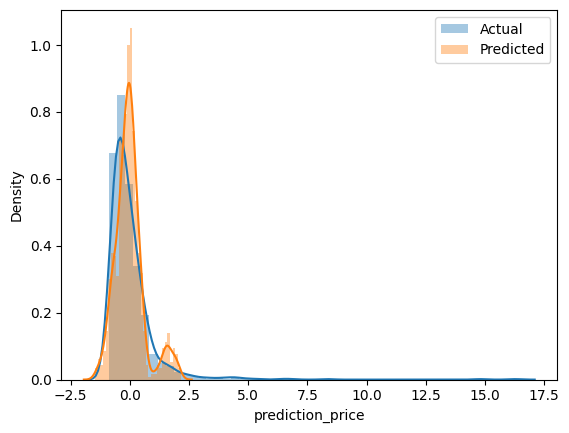

In [ ]:
# Melihat perbedaan actual dan prediksi
sns.distplot(df_statsmod['actual_price'], label="Actual")
sns.distplot(df_statsmod['prediction_price'], label="Predicted")
plt.legend()
plt.show

#### Asumsi autokorelasi

Skor Durbin-Watson antara 1,5 dan 2,5 maka tidak ada autokorelasi dan asumsi puas.


In [ ]:
statsmodels.stats.stattools.durbin_watson(results.resid, axis=0)

2.0008612620561554

#### Uji Homoskedasitas

Uji Homoskedasitas untuk melihat apakah terdapat ketidaksamaan varians dari residual satu ke pengamatan ke pengamatan yang lain, dari grafik yang dihasilkan dibawah ini, terlihat data berkumpul dalam satu pusat sehingga dapat dikatakan homoskedasitas terpenuhi


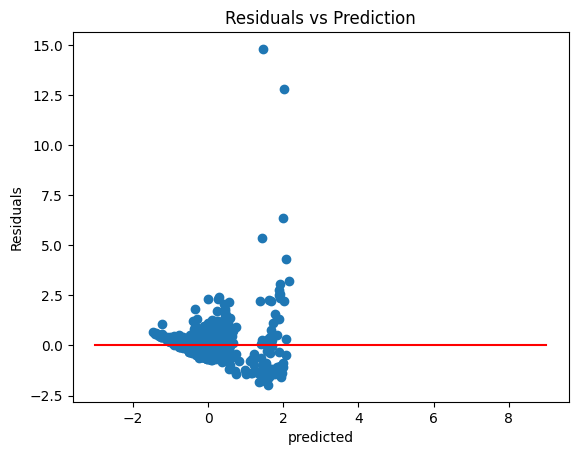

In [ ]:
asm_homosk = plt.scatter(df_statsmod['prediction_price'], df_statsmod["residual"])
plt.xlabel('predicted')
plt.ylabel('Residuals')
asm_homosk = plt.plot([-3,9],[0,0],color='red')
asm_homosk = plt.title('Residuals vs Prediction')

## Evaluation Model

In [ ]:
# R-square
print('R-square :', metrics.r2_score(df_statsmod['actual_price'], df_statsmod['prediction_price']))

R-square : 0.36474174024543315


In [ ]:
# MSE
print('MSE :', metrics.mean_squared_error(df_statsmod['actual_price'], df_statsmod['prediction_price']))

MSE : 0.7824147605415838


##Uji Partial Analisis Regresi
**Uji Parameter T-test** memiliki tujuan, apakah variabel independent(X) memberikan pengaruh secara partial terhadap variabel dependent (Y)

In [ ]:
results.tvalues


array([ -0.47202128,  18.61658654,  -4.42829656, -15.42277177,
        -2.33929318, -30.04632532])

In [ ]:
t_test_const, t_test_X1, t_test_X2, t_test_X3, t_test_X4, t_test_X5 = results.tvalues

print("T-test score const: ", t_test_const)
print("T-test score X1: ", t_test_X1)
print("T-test score X2: ", t_test_X2)
print("T-test score X3: ", t_test_X3)
print("T-test score X4: ", t_test_X4)
print("T-test score X5: ", t_test_X5)

T-test score const:  -0.47202127529045557
T-test score X1:  18.616586540867406
T-test score X2:  -4.428296564897525
T-test score X3:  -15.422771767538146
T-test score X4:  -2.339293183336769
T-test score X5:  -30.04632531679724


In [ ]:

p_value_const, p_value_X1, p_value_X2, p_value_X3, p_value_X4, p_value_X5  = results.pvalues
print("P-value const: ", p_value_const)
print("P-value X1: ", p_value_X1)
print("P-value X2: ", p_value_X2)
print("P-value X3: ", p_value_X3)
print("P-value X4: ", p_value_X4)
print("P-value X5: ", p_value_X5)

P-value const:  0.6369547304488021
P-value X1:  2.4336459242249485e-72
P-value X2:  9.925807019893336e-06
P-value X3:  3.1253717573342715e-51
P-value X4:  0.019402298429902563
P-value X5:  1.6261065057533442e-168


Diperoleh dari output diatas, bahwa P-value ketiga variabel kurang dari 0,05 sehingga Hypothesis null ditolak dan dapat disimpulkan, bahwa ketiga variabel independen (X) memberikan pengaruh secara signifikan pada variabel dependen Sale Price (Y).

**Uji kelayakan model F-test** memilki tujuan, apakah model yang dibentuk layak digunakan atau tidak

In [ ]:
f_value = results.fvalue
print("f-test score : ", f_value)

p_value = results.f_pvalue
print("P-value : ", p_value)

if p_value < 0.05:
  print("Tolak H0")
else:
  print("Terima H0")

f-test score :  404.0116478330881
P-value :  1.3382814587e-314
Tolak H0


Hasil uji F menunjukkan nilai F-statistic sebesar 404.01 dan p-value yang sangat kecil (1.34e-314), yang mengindikasikan bahwa model regresi secara keseluruhan signifikan secara statistik. P-value yang lebih kecil dari 0.05 mengarah pada penolakan hipotesis nol (H0), yang menyatakan bahwa tidak ada hubungan antara variabel independen dan dependen. Dengan demikian,  bisa disimpulkan bahwa setidaknya satu variabel independen dalam model memiliki pengaruh yang signifikan terhadap variabilitas variabel dependen, yang menunjukkan bahwa model regresi ini dapat digunakan untuk menjelaskan hubungan antara variabel-variabel tersebut.